In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('bank-full.csv', delimiter=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
print(bank.shape)
bank.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# List of Numerical Variables
numerical_features=[feature for feature in bank.columns if bank[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
bank[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [8]:
discrete_feature=[feature for feature in numerical_features if len(bank[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 0


In [9]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [10]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

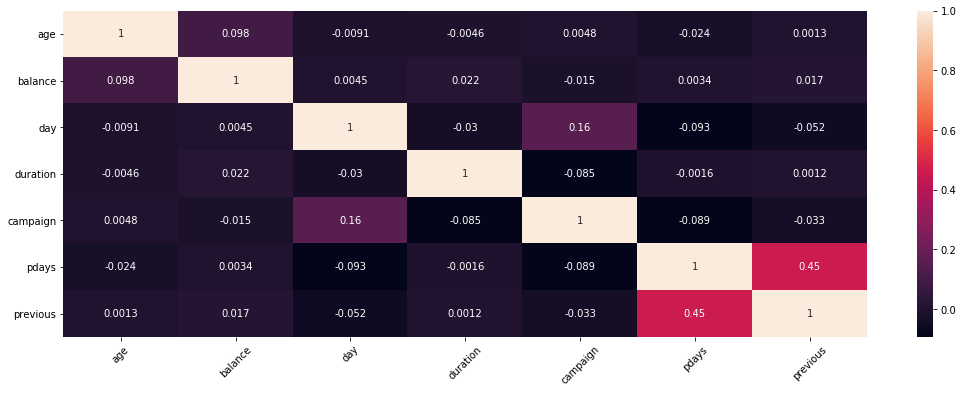

In [11]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(bank.corr(), annot=True);
plt.xticks(rotation=45)

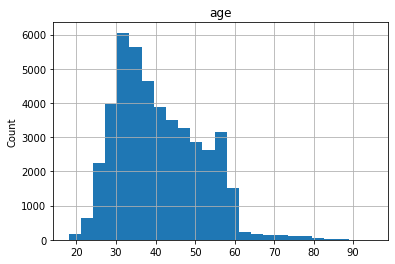

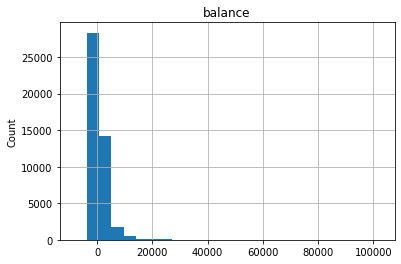

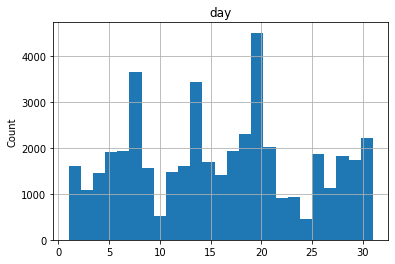

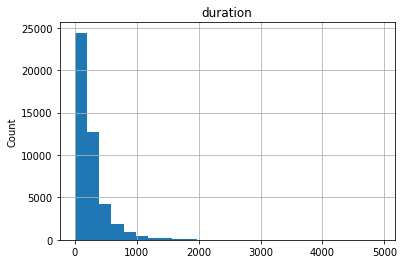

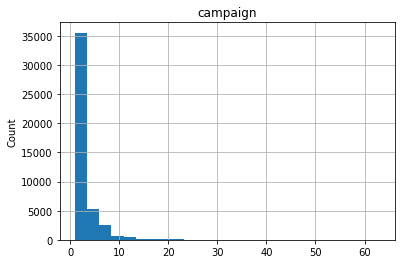

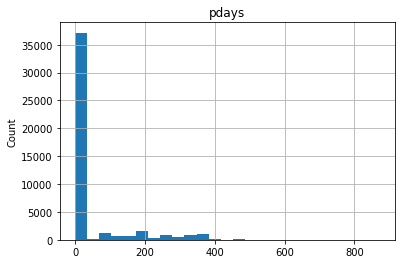

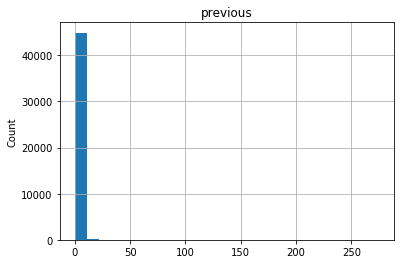

In [12]:
for feature in continuous_feature:
    data=bank.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

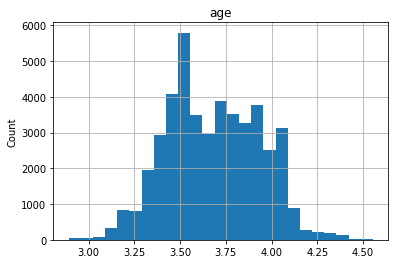

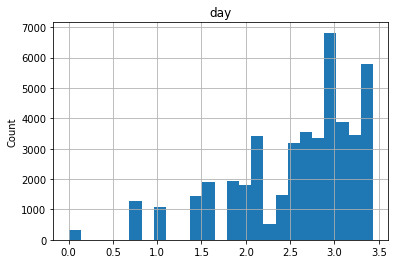

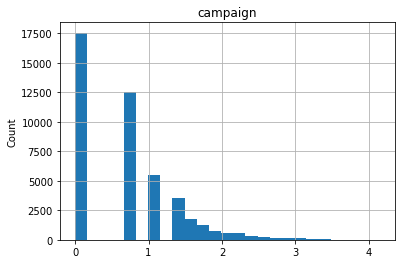

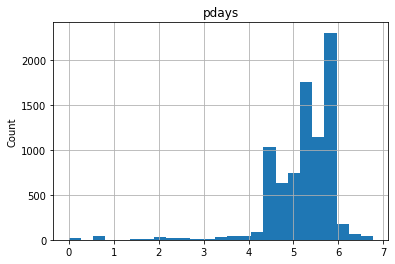

In [13]:
for feature in continuous_feature:
    data=bank.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

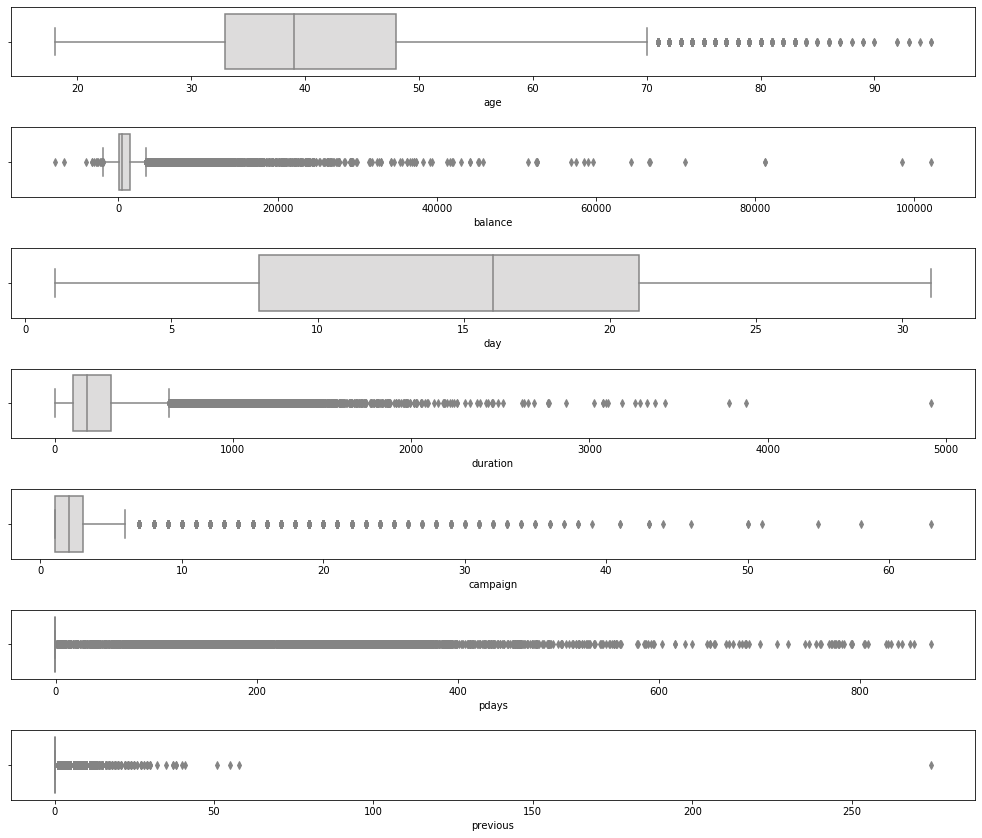

In [14]:
#Outliners detection
ot=bank.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='coolwarm',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='coolwarm',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='coolwarm',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='coolwarm',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='coolwarm',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='coolwarm',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='coolwarm',ax=axes[6])
plt.tight_layout(pad=2.0)

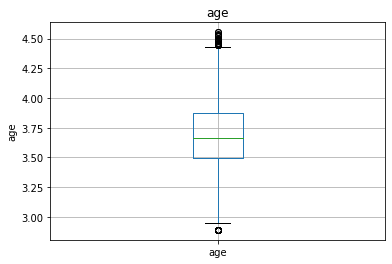

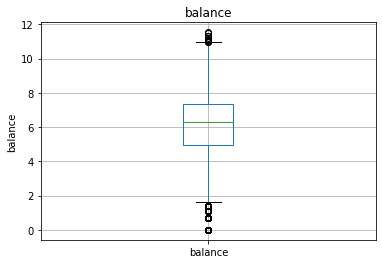

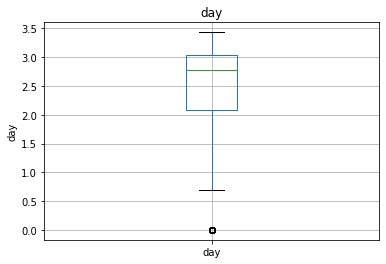

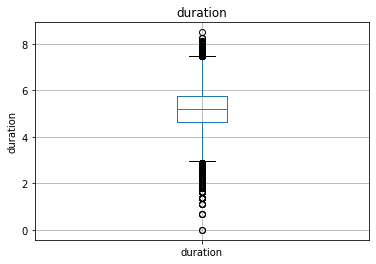

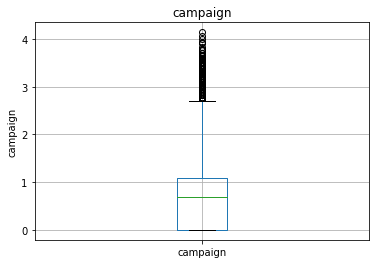

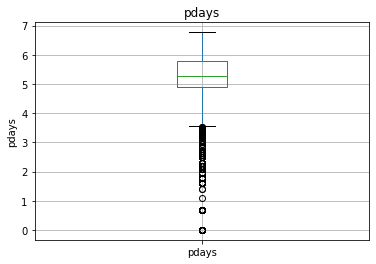

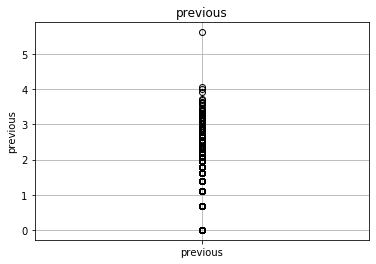

In [15]:
for feature in continuous_feature:
    data=bank.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

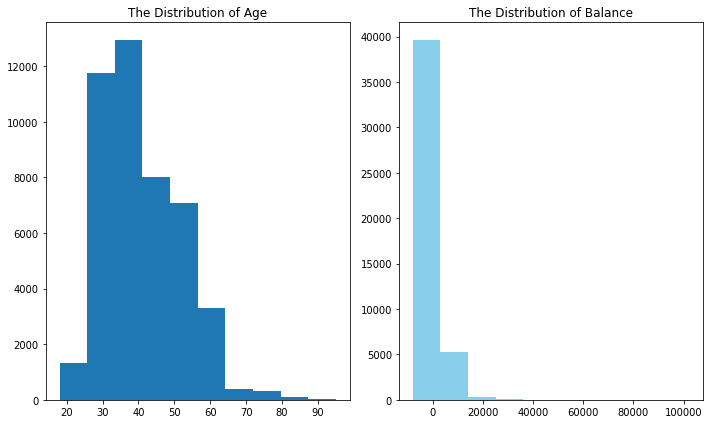

In [16]:
#Visualize the distribution of 'age' and 'balance'
dist_age_balance = plt.figure(figsize = (10,6))
ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)
ra1.hist(bank['age'])
ra1.set_title('The Distribution of Age')
ra2.hist(bank['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')
plt.tight_layout() 
plt.show()

In [17]:
bank[['age','balance']].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [18]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (bank[bank['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (bank[bank['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


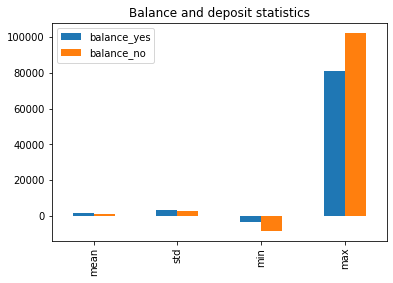

In [19]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [20]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (bank[bank['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (bank[bank['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


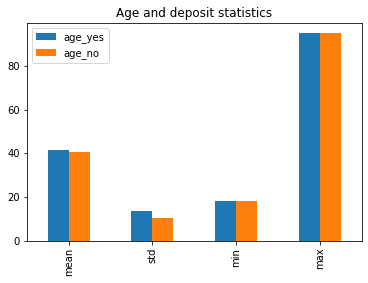

In [21]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [22]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (bank[bank['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (bank[bank['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


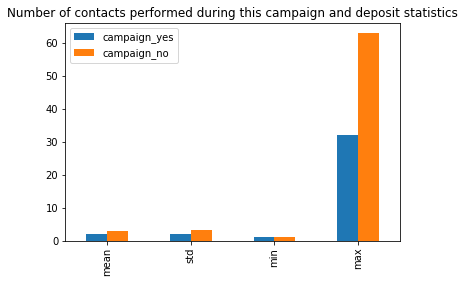

In [23]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [24]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (bank[bank['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (bank[bank['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


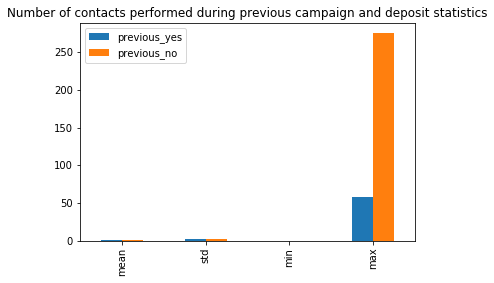

In [25]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

In [26]:
categorical_features=[feature for feature in bank.columns if bank[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
bank[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [27]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(bank[feature].unique()),feature))

12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


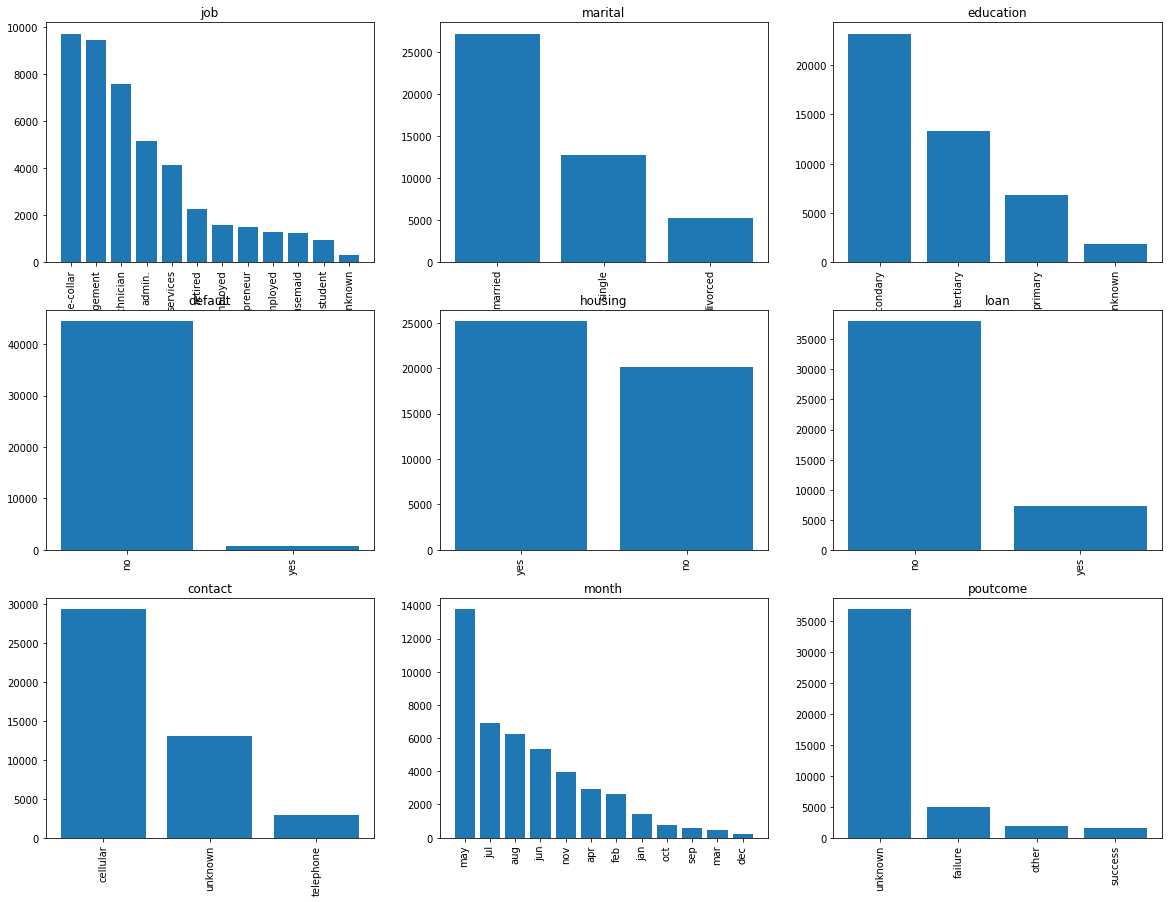

In [29]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Text(0.5, 1.0, 'Jobs')

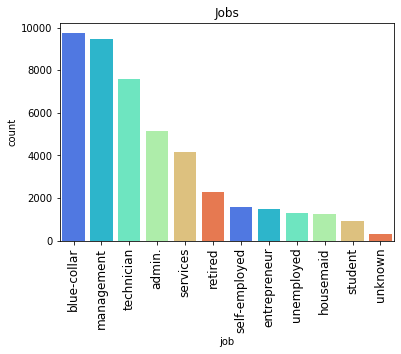

In [30]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=bank, palette = pal, 
              order=bank['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital Status')

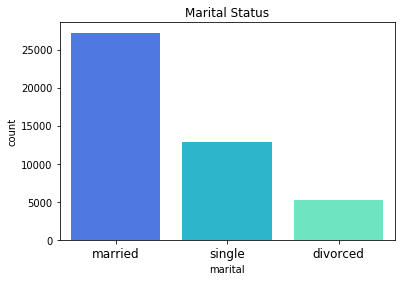

In [31]:
sns.countplot(x='marital', data=bank, palette = pal, 
              order=bank['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

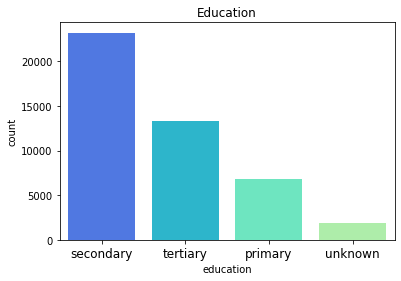

In [32]:
sns.countplot(x='education', data=bank, palette = pal, 
              order=bank['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

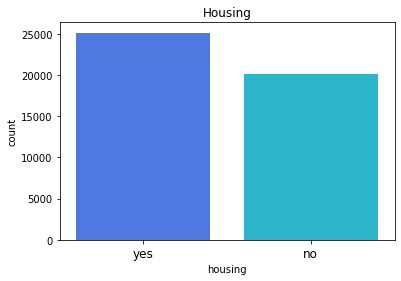

In [33]:
sns.countplot(x='housing', data=bank, palette = pal, 
              order=bank['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')

Text(0.5, 1.0, 'Loan')

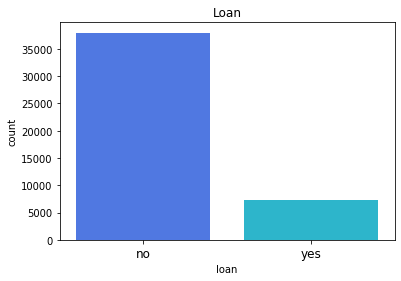

In [34]:
sns.countplot(x='loan', data=bank, palette = pal, 
              order=bank['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')

In [35]:
countNotermdeposit = len(bank[bank.y == 'no'])
counthavetermdeposit = len(bank[bank.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(bank.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(bank.y))*100)))

Percentage of Customer doesn't have a term deposit: 88.30%
Percentage of Customer have a term deposit: 11.70%


In [36]:
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Whether the client has subscribed a term deposit or not ')

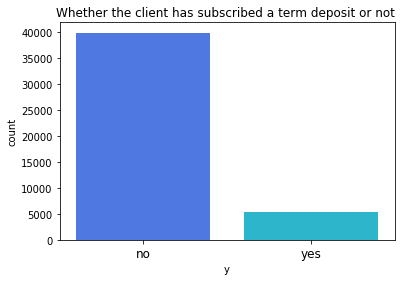

In [37]:
sns.countplot(x='y', data=bank, palette = pal, 
              order=bank['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has subscribed a term deposit or not ')

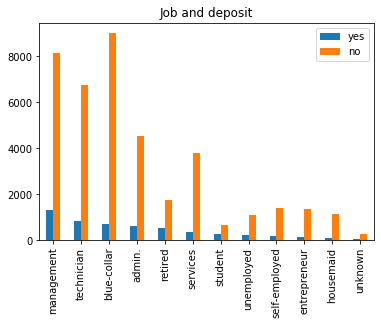

In [38]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

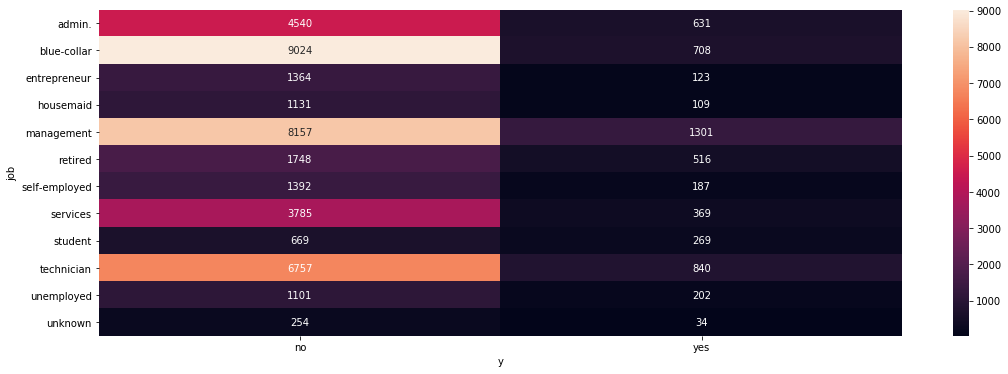

In [39]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=bank['job'], columns=bank['y']), annot=True,fmt='g')

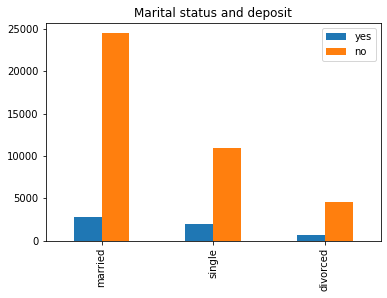

In [40]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

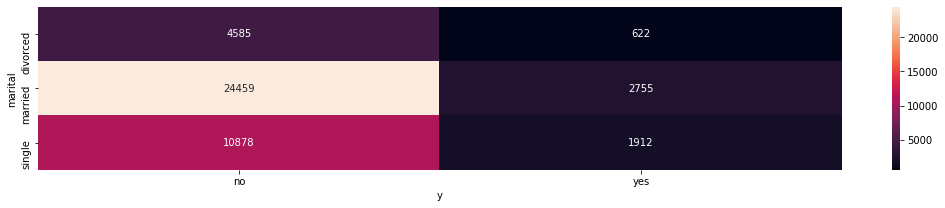

In [41]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=bank['marital'], columns=bank['y']), annot=True, fmt='g')

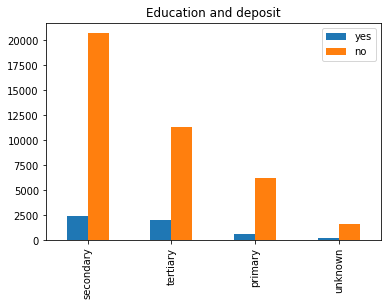

In [42]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

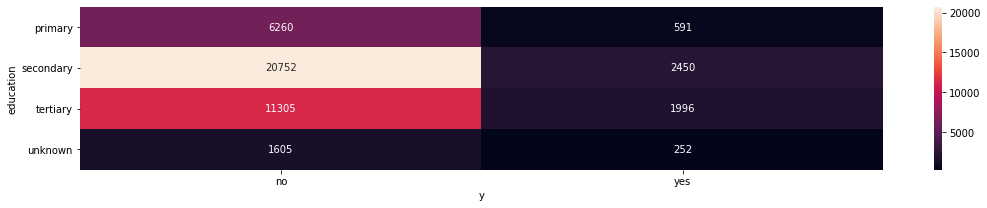

In [43]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=bank['education'], columns=bank['y']), annot=True, fmt='g')

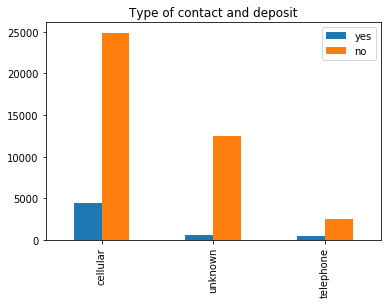

In [44]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

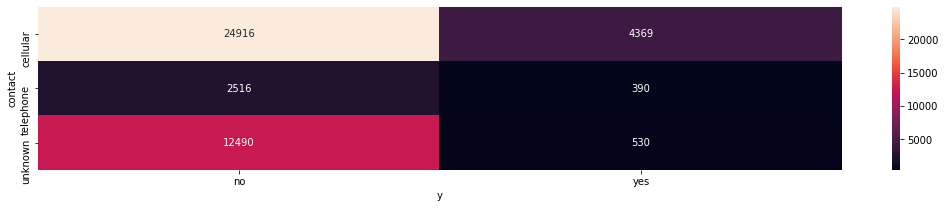

In [45]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=bank['contact'], columns=bank['y']), annot=True, fmt='g')

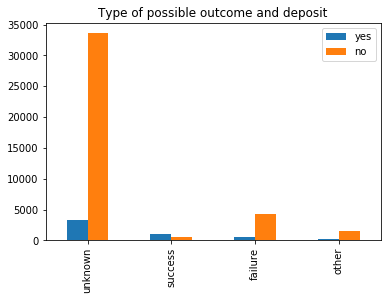

In [46]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['poutcome'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'Type of possible outcome and deposit')

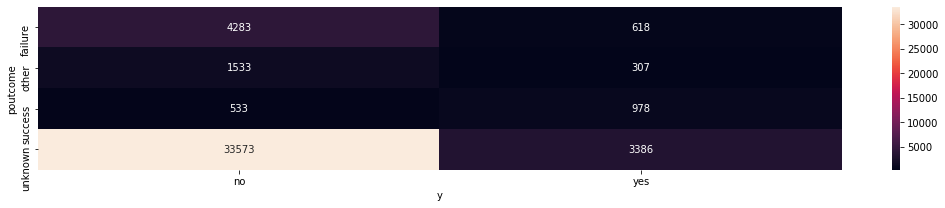

In [47]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=bank['poutcome'], columns=bank['y']), annot=True, fmt='g')

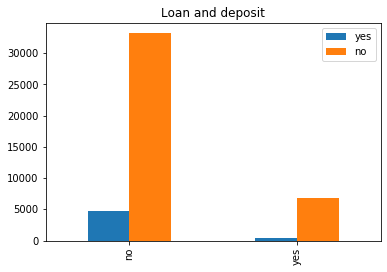

In [48]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank[bank['y'] == 'yes']['loan'].value_counts()
j_df['no'] = bank[bank['y'] == 'no']['loan'].value_counts()

j_df.plot.bar(title = 'Loan and deposit')

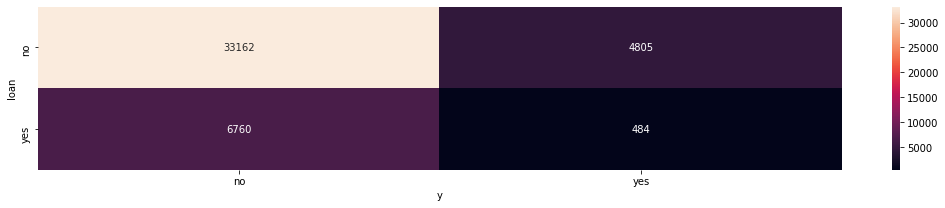

In [49]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=bank['loan'], columns=bank['y']), annot=True, fmt='g')

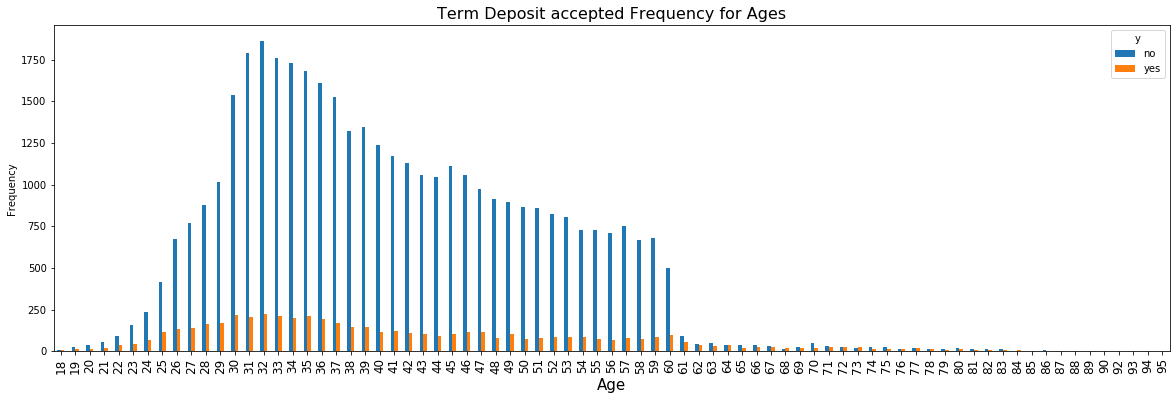

In [50]:
pd.crosstab(bank.age,bank.y).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

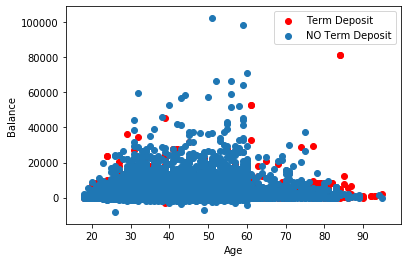

In [51]:
plt.scatter(x=bank.age[bank.y== 'yes'], y=bank.balance[(bank.y== 'yes')], c="red")
plt.scatter(x=bank.age[bank.y== 'no'], y=bank.balance[(bank.y== 'no')])
plt.legend(["Term Deposit", "NO Term Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

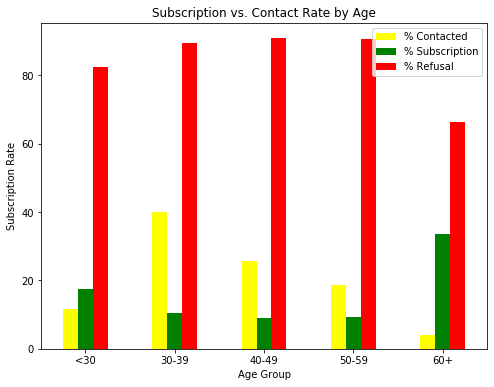

In [52]:
lst = [bank]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(bank['y'],bank['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(bank['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Contacted','% Subscription','% Refusal']].plot(kind = 'bar', figsize=(8,6), color = ('yellow','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

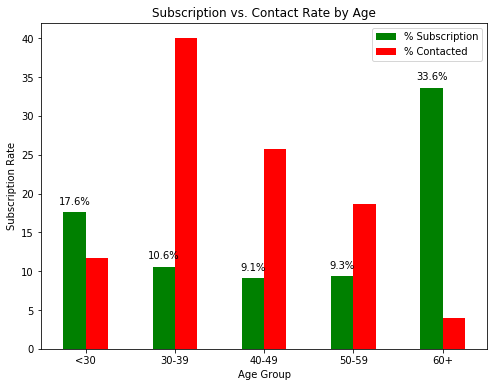

In [53]:
lst = [bank]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(bank['y'],bank['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(bank['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar', figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

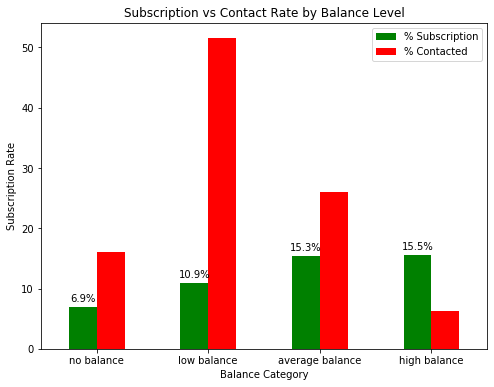

In [54]:
lst = [bank]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(bank['y'],bank['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(bank['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [55]:
# Step 1: Change column name: 'y' to 'response'
df  =bank.copy()
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

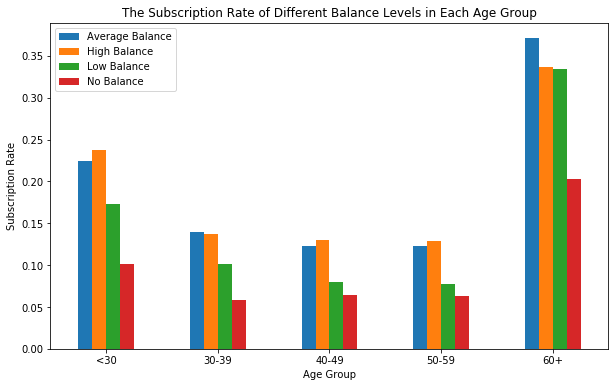

In [56]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

In [57]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [58]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

response,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


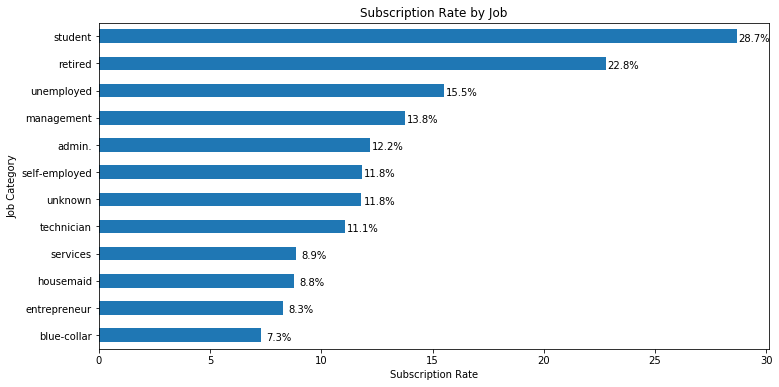

In [59]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches, count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center', va='bottom')

In [60]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [61]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct

response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


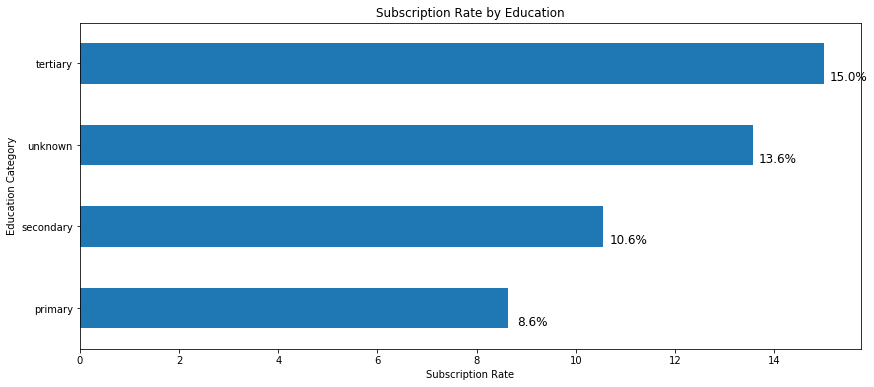

In [62]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh', figsize = (14,6))
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches, count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center', va='bottom', fontsize = 'large')

In [63]:
cols = [col for col in bank.columns]
col_missing = []
for col in cols:
    if 'unknown' in bank[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing) 

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


In [64]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",bank[bank[col].str.contains('unknown')][col].count())

Unknown values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [65]:
print(bank.groupby(bank['job'])['job'].count(),"\n")

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [66]:
print(bank.groupby(bank['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [67]:
print(bank.groupby(bank['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [68]:
print(bank.groupby(bank['contact'])['contact'].count(),"\n")

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



In [69]:
df = bank.copy()

In [70]:
# Replace 'unknown' in job and education with 'other'
df[['job','education','contact','poutcome']] = df[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [71]:
df.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [72]:
# Custom Binary Encoding of Binary o/p variables 
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0,50.0,average balance
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0,40.0,low balance
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0,30.0,low balance
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0,40.0,average balance
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0,30.0,low balance
5,35,management,married,tertiary,0,231,1,0,other,5,may,139,1,-1,0,other,0,30.0,low balance
6,28,management,single,tertiary,0,447,1,1,other,5,may,217,1,-1,0,other,0,20.0,low balance
7,42,entrepreneur,divorced,tertiary,1,2,1,0,other,5,may,380,1,-1,0,other,0,40.0,low balance
8,58,retired,married,primary,0,121,1,0,other,5,may,50,1,-1,0,other,0,50.0,low balance
9,43,technician,single,secondary,0,593,1,0,other,5,may,55,1,-1,0,other,0,40.0,low balance


In [73]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome,balance_group
0,management,married,tertiary,other,may,other,average balance
1,technician,single,secondary,other,may,other,low balance
2,entrepreneur,married,secondary,other,may,other,low balance
3,blue-collar,married,other,other,may,other,average balance
4,other,single,other,other,may,other,low balance


In [74]:
categorical.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [75]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [76]:
# concatination of two dataframes 'bank' and 'dummies'
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [77]:
# To see all columns
pd.set_option("display.max.columns", None)
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,58,0,2143,1,0,5,261,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
5,35,0,231,1,0,5,139,1,-1,0,0,30.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
6,28,0,447,1,1,5,217,1,-1,0,0,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
7,42,1,2,1,0,5,380,1,-1,0,0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
8,58,0,121,1,0,5,50,1,-1,0,0,50.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
9,43,0,593,1,0,5,55,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [78]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'age_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_other', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_other',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'balance_group_average balance',
       'balance_group_high balance', 'balance_group_low balance',
       'balance_group_no balance'],
      dtype='object')

In [79]:
df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']]=df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
age                              45211 non-null int64
default                          45211 non-null int64
balance                          45211 non-null int64
housing                          45211 non-null int64
loan                             45211 non-null int64
day                              45211 non-null int64
duration                         45211 non-null int64
campaign                         45211 non-null int64
pdays                            45211 non-null int64
previous                         45211 non-null int64
y                                45211 non-null int64
age_group                        45211 non-null float64
job_admin.                       45211 non-null int64
job_blue-collar                  45211 non-null int64
job_entrepreneur                 45211 non-null int64
job_housemaid                    45211 non-null int64
job_management           

In [80]:
from sklearn.preprocessing import StandardScaler

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,0.256419,1.606965,0.011016,0,1,0,5,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,-0.437895,0.288529,-0.416127,0,1,0,5,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,-0.446762,-0.747384,-0.707361,0,1,1,5,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0.047205,0.571051,-0.645231,0,1,0,5,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,-0.447091,-0.747384,-0.233620,0,0,0,5,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [81]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [83]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 52)
Shape of X_test:  (9043, 52)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [84]:
# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [85]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False  True False False False  True
 False  True  True  True  True False  True  True  True  True  True  True
 False False False False]
[33 36  1 17  1  3 35 22 38 34 37 14 20 12  7 26 19  6 25 23  1 27 31 29
  8 30 16  5 15 24 10  1 13 21  2  1 11  1  1  1  1  9  1  1  1  1  1  1
 28 32 18  4]


In [86]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('balance', False, 33),
 ('age', False, 36),
 ('duration', True, 1),
 ('default', False, 17),
 ('housing', True, 1),
 ('loan', False, 3),
 ('day', False, 35),
 ('campaign', False, 22),
 ('pdays', False, 38),
 ('previous', False, 34),
 ('age_group', False, 37),
 ('job_admin.', False, 14),
 ('job_blue-collar', False, 20),
 ('job_entrepreneur', False, 12),
 ('job_housemaid', False, 7),
 ('job_management', False, 26),
 ('job_other', False, 19),
 ('job_retired', False, 6),
 ('job_self-employed', False, 25),
 ('job_services', False, 23),
 ('job_student', True, 1),
 ('job_technician', False, 27),
 ('job_unemployed', False, 31),
 ('marital_divorced', False, 29),
 ('marital_married', False, 8),
 ('marital_single', False, 30),
 ('education_other', False, 16),
 ('education_primary', False, 5),
 ('education_secondary', False, 15),
 ('education_tertiary', False, 24),
 ('contact_cellular', False, 10),
 ('contact_other', True, 1),
 ('contact_telephone', False, 13),
 ('month_apr', False, 21),
 ('mont

In [87]:
x_train.columns[rfe.support_]

Index(['duration', 'housing', 'job_student', 'contact_other', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [88]:
x_train.columns[~rfe.support_]

Index(['balance', 'age', 'default', 'loan', 'day', 'campaign', 'pdays',
       'previous', 'age_group', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_feb', 'month_may',
       'balance_group_average balance', 'balance_group_high balance',
       'balance_group_low balance', 'balance_group_no balance'],
      dtype='object')

In [89]:
col1 = x_train.columns[rfe.support_]
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36153
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8754.6
Date:                Sun, 21 Jan 2024   Deviance:                       17509.
Time:                        19:16:34   Pearson chi2:                 1.47e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.292e+12   4.08e+12      1.297      0.195    -2.7e+12    1.33e+13
duration             1.0847      0.019     58.070      0.000       1.048       1.121
housing             -0.6523      0.044    -14.817      0.000      -0.739      -0.566
job_student          0.7064      0.104      6.816      0.000       0.503       0.909
contact_other       -1.8246      0.079    -23.095      0.000      -1.979      -1.670
month_dec            1.1846      0.181      6.538      0.000       0.829       1.540
month_jan           -0.5705      0.118     -4.830      0.000      -0.802      -0.339
month_jul           -0.5713      0.064     -8.983      0.000      -0.696      -0.447
month_jun            0.9088      0.080     11.312      0.000       0.751       1.066
month_mar            2.1606      0.118     18.352      0.000       1.930       2.391
month_nov           -0.4224      0.075     -5.668      0.000      -0.568      -0.276
month_oct            1.4564      0.106     13.677      0.000       1.248       1.665
month_sep            1.4565      0.120     12.157      0.000       1.222       1.691
poutcome_failure -5.292e+12   4.08e+12     -1.297      0.195   -1.33e+13     2.7e+12
poutcome_other   -5.292e+12   4.08e+12     -1.297      0.195   -1.33e+13     2.7e+12
poutcome_success -5.292e+12   4.08e+12     -1.297      0.195   -1.33e+13     2.7e+12
====================================================================================
"""

In [90]:
# predicted values of the train dataset giving the probability
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

14001    0.017866
32046    0.668231
13318    0.062160
42991    0.038865
14237    0.047780
14360    0.020904
36635    0.048903
37042    0.033463
25994    0.046681
14555    0.027507
dtype: float64

In [91]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.01786587, 0.66823107, 0.06216003, 0.03886548, 0.04778007,
       0.02090419, 0.04890318, 0.03346293, 0.04668148, 0.0275068 ])

In [92]:
y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.017866,14001
1,1,0.668231,32046
2,0,0.062160,13318
3,0,0.038865,42991
4,0,0.047780,14237
5,0,0.020904,14360
6,0,0.048903,36635
7,0,0.033463,37042
8,0,0.046681,25994
9,0,0.027507,14555


In [93]:
y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train

13932    1
9894     0
39946    0
9217     0
4124     0
30085    0
17266    0
34553    0
5386     0
12146    0
4955     0
20124    0
43025    1
3413     0
39756    0
43952    0
1797     0
9989     0
17461    0
7267     0
23199    0
17482    0
10369    0
20810    0
35401    0
9377     0
43071    1
7986     0
22286    0
24606    0
        ..
7599     0
1871     0
18430    0
7877     0
37619    0
5072     0
2163     0
38804    0
6921     0
38984    0
27469    0
16921    0
35665    0
24152    1
43095    0
18983    0
32230    0
17089    0
14650    0
39512    1
15430    1
14935    0
20757    0
41993    1
32103    0
30403    0
21243    0
42613    1
43567    0
2732     0
Name: y, Length: 36168, dtype: int64

In [94]:
# creating confusion matrix for the following prediction
confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
confusion

array([[7768,  212],
       [ 712,  351]], dtype=int64)

In [95]:
print(ac(y_test_pred_final.Sub, y_test_pred_final.predict))

0.8978215194072764


In [96]:
# print the classification report
print('After Feature Selection','\n',report(y_test_pred_final.Sub, y_test_pred_final.predict))

After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [97]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [98]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)

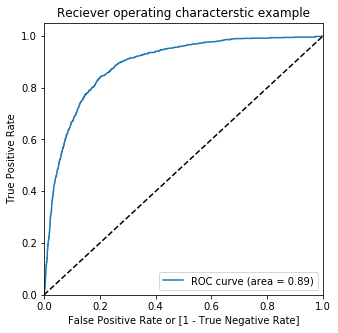

In [99]:
draw_roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)

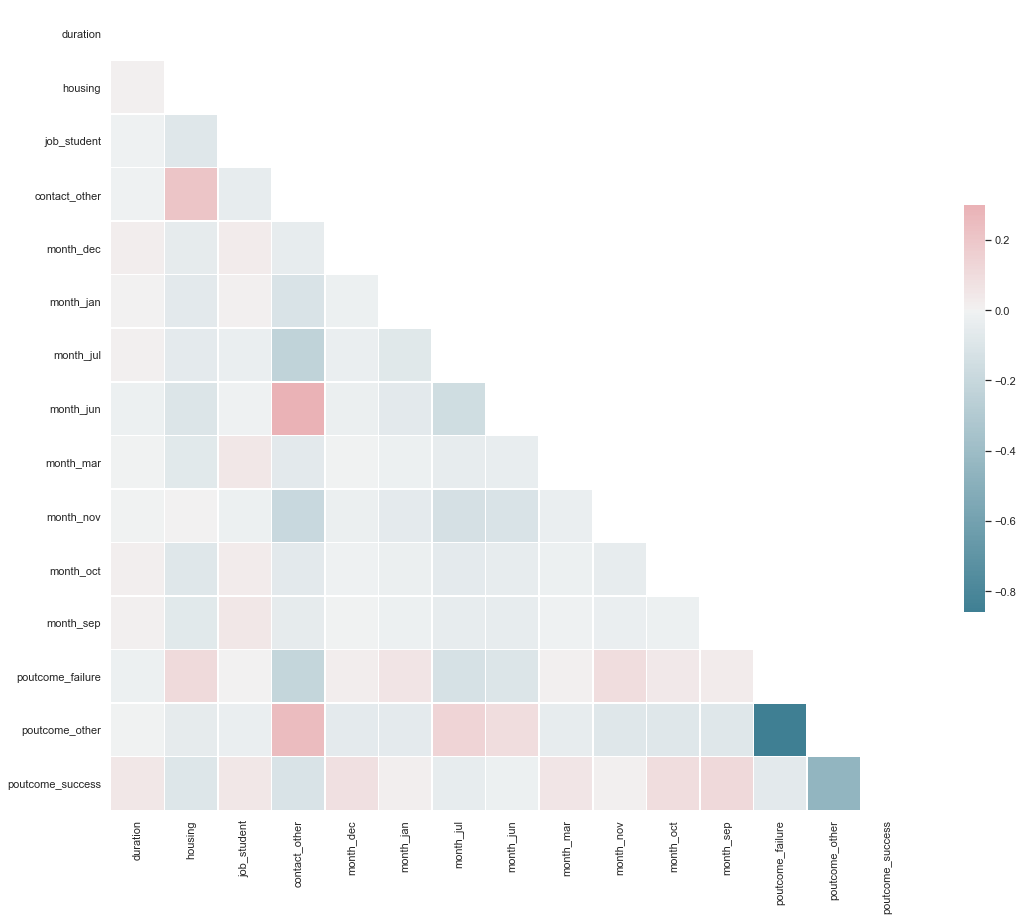

In [100]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [101]:
accuracy = {}

feature_selection = LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]], y_train)
ACC = feature_selection.score(x_test[x_test.columns[rfe.support_]],y_test)*100

accuracy['Logistic Regression after Feature Selection'] = ACC
print("Test Accuracy {:.2f}%".format(ACC))

Test Accuracy 89.88%


In [102]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 89.90%


In [103]:
#Predictions
y_predict = lr.predict(x_test)
y_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])

print('Without Feature Selection','\n', cm(y_test, y_predict))
print('After Feature Selection','\n', cm(y_test, y_pred))

Without Feature Selection 
 [[7754  226]
 [ 687  376]]
After Feature Selection 
 [[7762  218]
 [ 697  366]]


In [104]:
# print the classification report

print('Without Feature Selection','\n',report(y_test, y_predict))
print('After Feature Selection','\n',report(y_test, y_pred))

Without Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043

After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



In [105]:
lr.predict_proba(x)[:,1] 

array([0.01492914, 0.00911368, 0.00259506, ..., 0.97673456, 0.11849352,
       0.11797815])

In [106]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(lr.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(lr.score(x_test, y_test)*100))

Training set score: 90.31%
Test set score: 89.90%


In [107]:
y_test.value_counts()

0    7980
1    1063
Name: y, dtype: int64

In [108]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

Mean of 1's 0.1175494857901139 
 Percentage of 1's 12.0 %


In [109]:
# calculate the percentage of zeros
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 0's 0.8824505142098861 
 Percentage of 0's 88.0 %


In [110]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

0    0.882451
Name: y, dtype: float64

In [111]:
#Predictions
y_predict = lr.predict(x_test)

print(cm(y_test, y_predict))

[[7754  226]
 [ 687  376]]


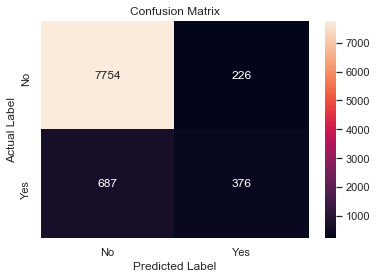

In [112]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [113]:
y_predict = lr.predict(x)

print(cm(y, y_predict))

[[38911  1011]
 [ 3408  1881]]


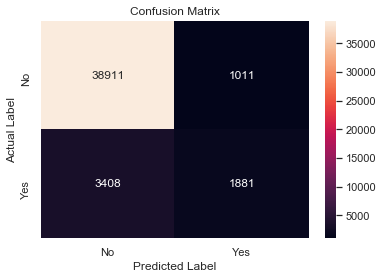

In [114]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [115]:
# save confusion matrix and slice into four pieces
confusion = cm(y, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[38911  1011]
 [ 3408  1881]]


In [116]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y, y_predict))

0.902258299971246
0.902258299971246


In [117]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y, y_predict))

0.09774170002875407
0.09774170002875404


In [118]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y, y_predict))

0.3556437889960295
0.3556437889960295


In [119]:
specificity = TN / (TN + FP)

print(specificity)

0.9746756174540354


In [120]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.02532438254596463
0.025324382545964585


In [121]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y, y_predict))

0.6504149377593361
0.6504149377593361


In [122]:
f1_score = 2*((precision_score(y, y_predict) * recall_score(y, y_predict))/(precision_score(y, y_predict) + recall_score(y, y_predict)))
f1_score

0.4598459845984599

In [123]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.99177098, 0.00822902],
       [0.26654235, 0.73345765],
       [0.98496236, 0.01503764],
       [0.99033065, 0.00966935],
       [0.97396773, 0.02603227],
       [0.97994232, 0.02005768],
       [0.95041595, 0.04958405],
       [0.9713065 , 0.0286935 ],
       [0.95038486, 0.04961514],
       [0.98831745, 0.01168255]])

In [124]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Subscription (0)', 'Prob of - Subscription (1)'])

y_pred_prob_df

,Prob of - No Subscription (0),Prob of - Subscription (1)
0,0.991771,0.008229
1,0.266542,0.733458
2,0.984962,0.015038
3,0.990331,0.009669
4,0.973968,0.026032
5,0.979942,0.020058
6,0.950416,0.049584
7,0.971307,0.028693
8,0.950385,0.049615
9,0.988317,0.011683


Text(0, 0.5, 'Frequency')

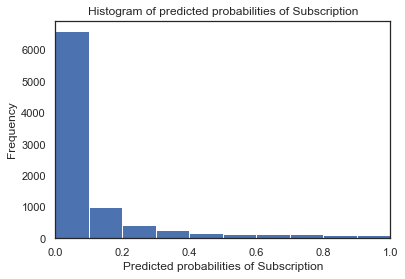

In [125]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = lr.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [126]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = lr.predict_proba(x_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
       
    cm1 = cm(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',
           
               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
                '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[6431 1549]
 [ 164  899]] 

 with 7330 correct predictions,  

 1549 Type I errors( False Positives),  

 164 Type II errors( False Negatives),  

 Accuracy score:  0.8105717129271259 

 Sensitivity:  0.845719661335842 

 Specificity:  0.805889724310777 



With 0.2 threshold the Confusion Matrix is  

 [[7226  754]
 [ 359  704]] 

 with 7930 correct predictions,  

 754 Type I errors( False Positives),  

 359 Type II errors( False Negatives),  

 Accuracy score:  0.8769213756496738 

 Sensitivity:  0.6622765757290687 

 Specificity:  0.9055137844611529 



With 0.3 threshold the Confusion Matrix is  

 [[7508  472]
 [ 495  568]] 

 with 8076 correct predictions,  

 472 Type I errors( False Positives),  

 495 Type II errors( False Negatives),  

 Accuracy score:  0.8930664602454937 

 Sensitivity:  0.5343367826904986 

 Specificity:  0.9408521303258145 



With 0.4 threshold the Confusion Matrix is  

 [[7664  316]
 [ 598  465]] 

 wit

In [128]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y, y_predict)
print(curve)

0.6651597032250325


In [129]:
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1763,0.392782,0.904227
1765,0.392658,0.904227
1761,0.392909,0.904227
1764,0.392660,0.904205
1760,0.392966,0.904205


In [130]:
# print the classification report

print(report(y, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     39922
           1       0.65      0.36      0.46      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.67      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [131]:
#Predictions
y_pred = lr.predict(x)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [132]:
# import imblearn library and resample the original data using SMOTE technique
from sklearn.neighbors import DistanceMetric
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 31942, 1: 4226})
Resampled dataset shape Counter({1: 31942, 0: 31942})


In [133]:
# training a Logistic Regression model on SMOTE data

lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
accuracies = {}

acc = lr_smote.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 84.43%


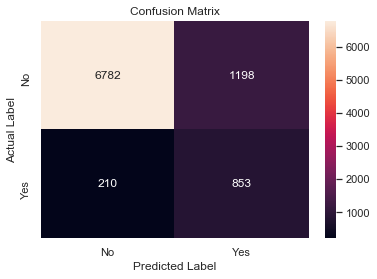

In [135]:
# plot confusion matrix to describe the performance of classifier.
#Predictions
y_predict_smote = lr_smote.predict(x_test)

cm_df_smote=cm(y_test, y_predict_smote)
class_label = ["No", "Yes"]
df_cm_smote = pd.DataFrame(cm_df_smote, index = class_label, columns = class_label)
sns.heatmap(df_cm_smote, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [136]:
# print the classification report

print(report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7980
           1       0.42      0.80      0.55      1063

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.90      0.84      0.86      9043



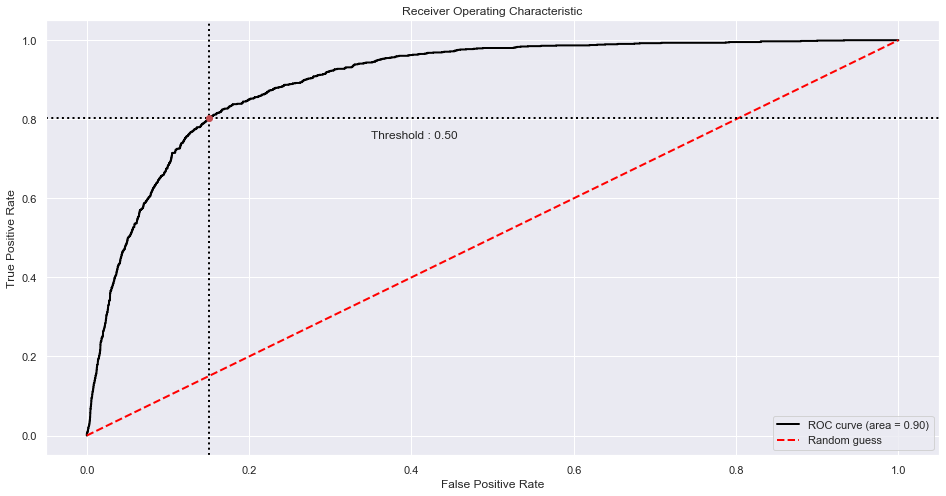

In [139]:
# let's compute the AUC curve for the model we developed on SMOTE data

from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1],  labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()

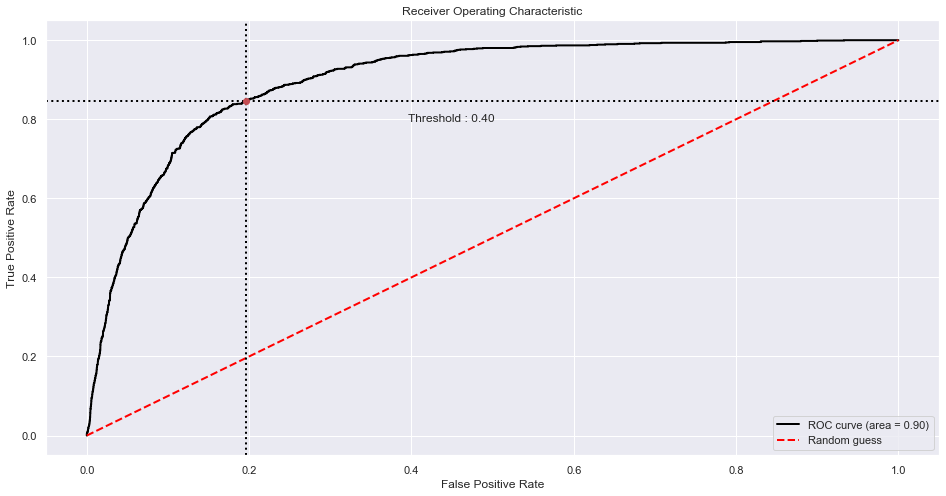

In [140]:
# let's use another probability threshold so that we can get to the elbow position in the above curve

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1], threshold=0.4, labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()

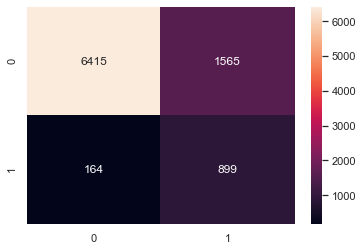

In [141]:
# compute the probabilites of test observations using rf_smote model

y_pred_proba = lr_smote.predict_proba(x_test)[:,1]
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_pred_labels = (y_pred_proba >= 0.4)
# plot the confusion matrix

sns.heatmap(cm(y_test, y_pred_labels), annot=True, fmt='0.0f')

In [142]:
# print the classification report

print(report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7980
           1       0.36      0.85      0.51      1063

    accuracy                           0.81      9043
   macro avg       0.67      0.82      0.70      9043
weighted avg       0.90      0.81      0.84      9043



# Conclusion 
Key outcomes of the analysis are the recommendations for future marketing campaigns:

The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490   $ are more likely to subscribe for term deposit, so future address those customers.
The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.
Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.